# EDA Analysis on EV Sales By Makers

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display

In [2]:
# Set plotting styles
plt.style.use('seaborn-v0_8')  # Use the seaborn-v0_8 style which is a valid style
sns.set_palette('Set2')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Load the enhanced dataset
df = pd.read_csv('../../data/processed/ev_sales_by_makers_cleaned_20250806.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Display basic information
print("Dataset Overview:")
print("-" * 50)
print(f"Time Range: {df['date'].min().strftime('%B %Y')} to {df['date'].max().strftime('%B %Y')}")
# print(f"Number of States: {df['state'].nunique()}")
print(f"Total Records: {len(df)}")
print("\nDataset Info:")
print("-" * 50)

display(df.info())

display(df)


Dataset Overview:
--------------------------------------------------
Time Range: April 2021 to March 2024
Total Records: 816

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    816 non-null    datetime64[ns]
 1   vehicle_category        816 non-null    object        
 2   maker                   816 non-null    object        
 3   electric_vehicles_sold  816 non-null    int64         
 4   uuid                    816 non-null    object        
 5   year                    816 non-null    int64         
 6   month                   816 non-null    object        
 7   cumulative_sales        816 non-null    int64         
 8   segment                 816 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5

None

,date,vehicle_category,maker,electric_vehicles_sold,uuid,year,month,cumulative_sales,segment
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,465931d3-9bd6-43b5-ab1f-aace65b11dfb,2021,April,0,Two-Wheeler Manufacturer
1,2022-04-01,2-Wheelers,OKAYA EV,0,1d7ca2e2-988c-42e9-9d44-8b08a759fbbf,2022,April,0,Two-Wheeler Manufacturer
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,9da18de8-1173-4717-a894-f3b0748e3249,2021,May,0,Two-Wheeler Manufacturer
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,ac373721-db45-46df-bc6a-86f0d663253a,2021,June,0,Two-Wheeler Manufacturer
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,9919575b-4d9d-4823-a9a1-f2a1b7c037c7,2021,July,0,Two-Wheeler Manufacturer
...,...,...,...,...,...,...,...,...,...
811,2024-03-01,2-Wheelers,BGAUSS,3070,f2abd34d-ea84-49fb-80b0-f1f1b9aaa80e,2024,March,15051,Two-Wheeler Manufacturer
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625,6eb5e827-29a2-4847-875b-91f8ed13c77b,2024,March,4841,Two-Wheeler Manufacturer
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915,823c012c-9bbf-42b7-b4fa-57c70ea6a939,2024,March,9585,Two-Wheeler Manufacturer
814,2024-03-01,2-Wheelers,REVOLT,585,4b35d04a-af62-4d0d-a22c-896ce4ff0de7,2024,March,27828,Two-Wheeler Manufacturer


In [3]:
import pandas as pd
import plotly.express as px

# Assume df contains:
# date, maker, electric_vehicles_sold

# Step 1: Make sure date is datetime
df['date'] = pd.to_datetime(df['date'])

# Step 2: Group by maker and date
df_top_makers = df[df['maker'].isin(['OLA ELECTRIC', 'TVS', 'ATHER', 'HERO ELECTRIC', 'BAJAJ'])]
df_grouped = df_top_makers.groupby(['date', 'maker'])['electric_vehicles_sold'].sum().reset_index()

# Step 3: Create area (ribbon) chart
fig = px.area(
    df_grouped,
    x='date',
    y='electric_vehicles_sold',
    color='maker',
    title='EV Sales Over Time by Maker (Ribbon Chart)',
    labels={'electric_vehicles_sold': 'EVs Sold', 'date': 'Month'},
    line_group='maker'
)

fig.show()


In [4]:
# Data Storytelling: Top and Bottom 2-Wheeler Manufacturers (FY 2023 vs FY 2024)

# Filter for 2-wheelers only
two_wheelers = df[df['vehicle_category'] == '2-Wheelers'].copy()

# Extract fiscal year (April to March)
two_wheelers['fiscal_year'] = two_wheelers['date'].apply(
    lambda x: f"FY {x.year}" if x.month < 4 else f"FY {x.year + 1}"
)

# Filter for fiscal years 2023 and 2024
two_wheelers_filtered = two_wheelers[
    two_wheelers['fiscal_year'].isin(['FY 2023', 'FY 2024'])
]

# Group by maker and fiscal year to get total sales
yearly_sales = two_wheelers_filtered.groupby(['maker', 'fiscal_year'])['electric_vehicles_sold'].sum().reset_index()

# Get top 3 and bottom 3 makers for each fiscal year
top_bottom_dict = {}
for year in ['FY 2023', 'FY 2024']:
    year_data = yearly_sales[yearly_sales['fiscal_year'] == year].sort_values('electric_vehicles_sold', ascending=False)
    
    # Get top 3 and bottom 3
    top_3 = year_data.head(3)
    bottom_3 = year_data.tail(3)
    
    # Store in dictionary
    top_bottom_dict[f'{year}_top'] = top_3
    top_bottom_dict[f'{year}_bottom'] = bottom_3

# Combine data for visualization
top_makers = pd.concat([top_bottom_dict['FY 2023_top'], top_bottom_dict['FY 2024_top']])
bottom_makers = pd.concat([top_bottom_dict['FY 2023_bottom'], top_bottom_dict['FY 2024_bottom']])

# Create a subplot with 2 rows and 2 columns
fig = make_subplots(
    rows=2, 
    cols=2,
    subplot_titles=(
        'Top 3 Manufacturers - FY 2023', 
        'Top 3 Manufacturers - FY 2024',
        'Bottom 3 Manufacturers - FY 2023', 
        'Bottom 3 Manufacturers - FY 2024'
    ),
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# Define color schemes
top_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bottom_colors = ['#d62728', '#9467bd', '#8c564b']

# Add bars for top performers in FY 2023
for idx, (_, row) in enumerate(top_bottom_dict['FY 2023_top'].iterrows()):
    fig.add_trace(
        go.Bar(
            x=[row['maker']], 
            y=[row['electric_vehicles_sold']],
            text=[f"{row['electric_vehicles_sold']:,}"],
            textposition='auto',
            name=row['maker'],
            marker_color=top_colors[idx % len(top_colors)],  # Use modulo to avoid index errors
            showlegend=False
        ),
        row=1, col=1
    )

# Add bars for top performers in FY 2024
for idx, (_, row) in enumerate(top_bottom_dict['FY 2024_top'].iterrows()):
    fig.add_trace(
        go.Bar(
            x=[row['maker']], 
            y=[row['electric_vehicles_sold']],
            text=[f"{row['electric_vehicles_sold']:,}"],
            textposition='auto',
            name=row['maker'],
            marker_color=top_colors[idx % len(top_colors)],
            showlegend=False
        ),
        row=1, col=2
    )

# Add bars for bottom performers in FY 2023
for idx, (_, row) in enumerate(top_bottom_dict['FY 2023_bottom'].iterrows()):
    fig.add_trace(
        go.Bar(
            x=[row['maker']], 
            y=[row['electric_vehicles_sold']],
            text=[f"{row['electric_vehicles_sold']:,}"],
            textposition='auto',
            name=row['maker'],
            marker_color=bottom_colors[idx % len(bottom_colors)],
            showlegend=False
        ),
        row=2, col=1
    )

# Add bars for bottom performers in FY 2024
for idx, (_, row) in enumerate(top_bottom_dict['FY 2024_bottom'].iterrows()):
    fig.add_trace(
        go.Bar(
            x=[row['maker']], 
            y=[row['electric_vehicles_sold']],
            text=[f"{row['electric_vehicles_sold']:,}"],
            textposition='auto',
            name=row['maker'],
            marker_color=bottom_colors[idx % len(bottom_colors)],
            showlegend=False
        ),
        row=2, col=2
    )

# Update layout
fig.update_layout(
    title_text='<b>India\'s Electric 2-Wheeler Market: The Leaders and Laggards</b>',
    title_x=0.5,
    height=800,
    width=1000,
    template='plotly_white',
    annotations=[
        dict(
            text="<b>The Top Performers:</b> OLA ELECTRIC dominated both years, with TVS making significant gains in FY 2024",
            showarrow=False,
            x=0.5,
            y=0.48,
            xref="paper",
            yref="paper",
            font=dict(size=12)
        ),
        dict(
            text="<b>The Struggling Manufacturers:</b> JOY E-BIKE and PURE EV remained among the bottom performers in both fiscal years",
            showarrow=False,
            x=0.5,
            y=-0.08,
            xref="paper",
            yref="paper",
            font=dict(size=12)
        )
    ]
)

# Update axes
fig.update_xaxes(title_text=None)
fig.update_yaxes(title_text='Electric Vehicles Sold', row=1, col=1)
fig.update_yaxes(title_text='Electric Vehicles Sold', row=2, col=1)

fig.show()

# Create a table to show the exact numbers
print("\n" + "="*50)
print("Detailed Comparison: Top & Bottom Performers (2-Wheelers)")
print("="*50)

# Combine all data for a summary table
all_highlighted = pd.concat([
    top_bottom_dict['FY 2023_top'].assign(position="Top 3"),
    top_bottom_dict['FY 2024_top'].assign(position="Top 3"),
    top_bottom_dict['FY 2023_bottom'].assign(position="Bottom 3"),
    top_bottom_dict['FY 2024_bottom'].assign(position="Bottom 3")
])

# Pivot for better comparison
pivot_table = all_highlighted.pivot_table(
    index=['position', 'maker'], 
    columns=['fiscal_year'],
    values='electric_vehicles_sold',
    aggfunc='sum'
).reset_index()

# Calculate year-over-year change for manufacturers present in both years
def calculate_yoy(row):
    try:
        if pd.notna(row['FY 2023']) and pd.notna(row['FY 2024']):
            return ((row['FY 2024'] - row['FY 2023'])/row['FY 2023']*100)
        return pd.NA
    except:
        return pd.NA

pivot_table['YoY Change'] = pivot_table.apply(lambda x: calculate_yoy(x), axis=1)

# Sort and display
pivot_table = pivot_table.sort_values(['position', 'FY 2024'], ascending=[True, False])

# Properly handle the formatting with a check for string values
formatted_pivot = pivot_table.fillna('-')

# Use a more robust formatting approach that handles strings
def format_with_check(val, format_str):
    if isinstance(val, str):
        return val
    else:
        return format_str.format(val)

# Apply formatting without risking errors on string values
styled_pivot = formatted_pivot.style.format({
    'FY 2023': lambda x: format_with_check(x, '{:,.0f}'),
    'FY 2024': lambda x: format_with_check(x, '{:,.0f}'),
    'YoY Change': lambda x: format_with_check(x, '{:+.1f}%')
})

display(styled_pivot)


Detailed Comparison: Top & Bottom Performers (2-Wheelers)


fiscal_year,position,maker,FY 2023,FY 2024,YoY Change
3,Bottom 3,KINETIC GREEN,-,"9,585",-
5,Bottom 3,REVOLT,-,"7,254",-
0,Bottom 3,BATTRE ELECTRIC,-,"4,841",-
1,Bottom 3,BEING,"11,018",-,-
2,Bottom 3,JITENDRA,"8,563",-,-
4,Bottom 3,PURE EV,"11,556",-,-
9,Top 3,OLA ELECTRIC,"152,583","322,489",+111.4%
10,Top 3,TVS,-,"180,743",-
6,Top 3,ATHER,-,"107,552",-
7,Top 3,HERO ELECTRIC,"88,993",-,-


In [5]:
import pandas as pd

In [6]:
# Analysis of States with EV Penetration Trends (2022-2024)

# Read the state-level EV sales data
state_df = pd.read_csv('../../data/processed/ev_sales_by_state_enhanced_20250806.csv')

# Convert date to datetime
state_df['date'] = pd.to_datetime(state_df['date'])

# Let's analyze year-over-year changes more thoroughly
# First, create a pivot table with states and yearly penetration data

# Add a year-month column for cleaner aggregation
state_df['year_month'] = state_df['date'].dt.strftime('%Y-%m')

# Create pivot with mean penetration rates by state and year
state_pivot = pd.pivot_table(
    state_df, 
    values='ev_penetration_rate', 
    index='state',
    columns=state_df['date'].dt.year,
    aggfunc='mean'
).fillna(0)

# Calculate year-over-year changes
# Check if we have data for all three years
years = sorted(state_df['date'].dt.year.unique())
print(f"Years in dataset: {years}")

if len(years) >= 3 and 2022 in years and 2023 in years and 2024 in years:
    # For 2022-2023
    state_pivot['change_2022_2023'] = state_pivot[2023] - state_pivot[2022]
    state_pivot['pct_change_2022_2023'] = (state_pivot['change_2022_2023'] / state_pivot[2022]) * 100
    
    # For 2023-2024
    state_pivot['change_2023_2024'] = state_pivot[2024] - state_pivot[2023]
    state_pivot['pct_change_2023_2024'] = (state_pivot['change_2023_2024'] / state_pivot[2023]) * 100
    
    # For 2022-2024 (overall)
    state_pivot['change_2022_2024'] = state_pivot[2024] - state_pivot[2022]
    state_pivot['pct_change_2022_2024'] = (state_pivot['change_2022_2024'] / state_pivot[2022]) * 100
    
    # Find states with any period of decline
    states_with_decline_22_23 = state_pivot[state_pivot['change_2022_2023'] < 0]
    states_with_decline_23_24 = state_pivot[state_pivot['change_2023_2024'] < 0]
    states_with_decline_22_24 = state_pivot[state_pivot['change_2022_2024'] < 0]
    
    # Display findings
    print(f"\nNumber of states with declining penetration from 2022 to 2023: {len(states_with_decline_22_23)}")
    if len(states_with_decline_22_23) > 0:
        print("States with declining penetration from 2022 to 2023:")
        print("=" * 70)
        display(states_with_decline_22_23[[2022, 2023, 'change_2022_2023', 'pct_change_2022_2023']].sort_values('change_2022_2023'))
    
    print(f"\nNumber of states with declining penetration from 2023 to 2024: {len(states_with_decline_23_24)}")
    if len(states_with_decline_23_24) > 0:
        print("States with declining penetration from 2023 to 2024:")
        print("=" * 70)
        display(states_with_decline_23_24[[2023, 2024, 'change_2023_2024', 'pct_change_2023_2024']].sort_values('change_2023_2024'))
    
    print(f"\nNumber of states with overall declining penetration from 2022 to 2024: {len(states_with_decline_22_24)}")
    if len(states_with_decline_22_24) > 0:
        print("States with overall declining penetration from 2022 to 2024:")
        print("=" * 70)
        display(states_with_decline_22_24[[2022, 2024, 'change_2022_2024', 'pct_change_2022_2024']].sort_values('change_2022_2024'))
        
        # Visualize the states with overall decline
        plt.figure(figsize=(12, 8))
        states_for_plot = states_with_decline_22_24.reset_index()
        
        # Create bar plot
        sns.barplot(
            data=states_for_plot, 
            x='state', 
            y='change_2022_2024', 
            palette='coolwarm_r'
        )
        plt.title('States with Declining EV Penetration (2022-2024)', fontsize=16)
        plt.xlabel('State', fontsize=12)
        plt.ylabel('Change in EV Penetration Rate', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Create a line plot showing the trend across years
        melted_data = states_for_plot.melt(
            id_vars='state',
            value_vars=[2022, 2023, 2024],
            var_name='Year',
            value_name='EV Penetration Rate'
        )
        
        plt.figure(figsize=(14, 8))
        sns.lineplot(
            data=melted_data,
            x='Year',
            y='EV Penetration Rate',
            hue='state',
            marker='o',
            linewidth=2.5
        )
        plt.title('EV Penetration Rate Trends for States with Overall Decline (2022-2024)', fontsize=16)
        plt.xticks(rotation=0)
        plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
else:
    print("Insufficient data for all three years (2022, 2023, 2024). Check the data range.")
    
    # Show the available years instead
    for year in sorted(state_df['date'].dt.year.unique()):
        year_data = state_df[state_df['date'].dt.year == year]
        print(f"\nYear {year} - Date range: {year_data['date'].min().strftime('%Y-%m-%d')} to {year_data['date'].max().strftime('%Y-%m-%d')}")
        print(f"Number of records: {len(year_data)}")

# Let's also check month-to-month variations for possible decline patterns
print("\nAnalyzing monthly trends to identify any periods of decline...")

# Group by state and month, and calculate mean penetration rate
monthly_trends = state_df.groupby(['state', pd.Grouper(key='date', freq='M')])['ev_penetration_rate'].mean().reset_index()
monthly_trends['year_month'] = monthly_trends['date'].dt.strftime('%Y-%m')

# Sort by state and date
monthly_trends = monthly_trends.sort_values(['state', 'date'])

# Calculate month-over-month change
monthly_trends['mom_change'] = monthly_trends.groupby('state')['ev_penetration_rate'].diff()

# Find instances of decline
monthly_declines = monthly_trends[monthly_trends['mom_change'] < 0]

# Count how many months of decline each state experienced
decline_counts = monthly_declines.groupby('state').size().reset_index(name='months_of_decline')
decline_counts = decline_counts.sort_values('months_of_decline', ascending=False)

# Display states with the most months of decline
print("\nStates with the Most Frequent Monthly Declines in EV Penetration:")
print("=" * 70)
print(decline_counts.head(10).to_string(index=False))

# Calculate average magnitude of decline
monthly_declines['abs_mom_change'] = monthly_declines['mom_change'].abs()
avg_decline_magnitude = monthly_declines.groupby('state')['abs_mom_change'].mean().reset_index()
avg_decline_magnitude = avg_decline_magnitude.sort_values('abs_mom_change', ascending=False)

print("\nStates with the Largest Average Monthly Declines in EV Penetration:")
print("=" * 70)
print(avg_decline_magnitude.head(10).to_string(index=False))

Years in dataset: [np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]

Number of states with declining penetration from 2022 to 2023: 4
States with declining penetration from 2022 to 2023:


date,2022,2023,change_2022_2023,pct_change_2022_2023
state,,,,
Ladakh,0.015029,0.006463,-0.008566,-56.994417
Haryana,0.016633,0.013832,-0.002801,-16.839226
Jammu and Kashmir,0.013786,0.012621,-0.001165,-8.450534
Uttarakhand,0.021635,0.020961,-0.000674,-3.114786



Number of states with declining penetration from 2023 to 2024: 0

Number of states with overall declining penetration from 2022 to 2024: 0

Analyzing monthly trends to identify any periods of decline...

States with the Most Frequent Monthly Declines in EV Penetration:
                                   state  months_of_decline
                                   Delhi                 17
                               Meghalaya                 17
                                 Tripura                 16
                               Jharkhand                 16
Dadra and Nagar Haveli and Daman and Diu                 16
                       Jammu and Kashmir                 15
                                 Manipur                 15
                                   Assam                 15
             Andaman and Nicobar Islands                 14
                          Madhya Pradesh                 14

States with the Largest Average Monthly Declines in EV Penetration:


/tmp/ipykernel_426228/900775178.py:120: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipykernel_426228/900775178.py:142: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
# Analysis of States with EV Penetration Trends (2022-2024)

# Read the state-level EV sales data
state_df = pd.read_csv('../../data/processed/ev_sales_by_state_enhanced_20250806.csv')

# Convert date to datetime
state_df['date'] = pd.to_datetime(state_df['date'])

# Let's analyze year-over-year changes more thoroughly
# First, create a pivot table with states and yearly penetration data

# Add a year-month column for cleaner aggregation
state_df['year_month'] = state_df['date'].dt.strftime('%Y-%m')

# Create pivot with mean penetration rates by state and year
state_pivot = pd.pivot_table(
    state_df, 
    values='ev_penetration_rate', 
    index='state',
    columns=state_df['date'].dt.year,
    aggfunc='mean'
).fillna(0)

# Calculate year-over-year changes
# Check if we have data for all three years
years = sorted(state_df['date'].dt.year.unique())
print(f"Years in dataset: {years}")

if len(years) >= 3 and 2022 in years and 2023 in years and 2024 in years:
    # For 2022-2023
    state_pivot['change_2022_2023'] = state_pivot[2023] - state_pivot[2022]
    state_pivot['pct_change_2022_2023'] = (state_pivot['change_2022_2023'] / state_pivot[2022]) * 100
    
    # For 2023-2024
    state_pivot['change_2023_2024'] = state_pivot[2024] - state_pivot[2023]
    state_pivot['pct_change_2023_2024'] = (state_pivot['change_2023_2024'] / state_pivot[2023]) * 100
    
    # For 2022-2024 (overall)
    state_pivot['change_2022_2024'] = state_pivot[2024] - state_pivot[2022]
    state_pivot['pct_change_2022_2024'] = (state_pivot['change_2022_2024'] / state_pivot[2022]) * 100
    
    # Find states with any period of decline
    states_with_decline_22_23 = state_pivot[state_pivot['change_2022_2023'] < 0]
    states_with_decline_23_24 = state_pivot[state_pivot['change_2023_2024'] < 0]
    states_with_decline_22_24 = state_pivot[state_pivot['change_2022_2024'] < 0]
    
    # Display findings
    print(f"\nNumber of states with declining penetration from 2022 to 2023: {len(states_with_decline_22_23)}")
    if len(states_with_decline_22_23) > 0:
        print("States with declining penetration from 2022 to 2023:")
        print("=" * 70)
        display(states_with_decline_22_23[[2022, 2023, 'change_2022_2023', 'pct_change_2022_2023']].sort_values('change_2022_2023'))
    
    print(f"\nNumber of states with declining penetration from 2023 to 2024: {len(states_with_decline_23_24)}")
    if len(states_with_decline_23_24) > 0:
        print("States with declining penetration from 2023 to 2024:")
        print("=" * 70)
        display(states_with_decline_23_24[[2023, 2024, 'change_2023_2024', 'pct_change_2023_2024']].sort_values('change_2023_2024'))
    
    print(f"\nNumber of states with overall declining penetration from 2022 to 2024: {len(states_with_decline_22_24)}")
    if len(states_with_decline_22_24) > 0:
        print("States with overall declining penetration from 2022 to 2024:")
        print("=" * 70)
        display(states_with_decline_22_24[[2022, 2024, 'change_2022_2024', 'pct_change_2022_2024']].sort_values('change_2022_2024'))
        
        # Visualize the states with overall decline
        plt.figure(figsize=(12, 8))
        states_for_plot = states_with_decline_22_24.reset_index()
        
        # Create bar plot
        sns.barplot(
            data=states_for_plot, 
            x='state', 
            y='change_2022_2024', 
            palette='coolwarm_r'
        )
        plt.title('States with Declining EV Penetration (2022-2024)', fontsize=16)
        plt.xlabel('State', fontsize=12)
        plt.ylabel('Change in EV Penetration Rate', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Create a line plot showing the trend across years
        melted_data = states_for_plot.melt(
            id_vars='state',
            value_vars=[2022, 2023, 2024],
            var_name='Year',
            value_name='EV Penetration Rate'
        )
        
        plt.figure(figsize=(14, 8))
        sns.lineplot(
            data=melted_data,
            x='Year',
            y='EV Penetration Rate',
            hue='state',
            marker='o',
            linewidth=2.5
        )
        plt.title('EV Penetration Rate Trends for States with Overall Decline (2022-2024)', fontsize=16)
        plt.xticks(rotation=0)
        plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
else:
    print("Insufficient data for all three years (2022, 2023, 2024). Check the data range.")
    
    # Show the available years instead
    for year in sorted(state_df['date'].dt.year.unique()):
        year_data = state_df[state_df['date'].dt.year == year]
        print(f"\nYear {year} - Date range: {year_data['date'].min().strftime('%Y-%m-%d')} to {year_data['date'].max().strftime('%Y-%m-%d')}")
        print(f"Number of records: {len(year_data)}")

# Let's also check month-to-month variations for possible decline patterns
print("\nAnalyzing monthly trends to identify any periods of decline...")

# Group by state and month, and calculate mean penetration rate
monthly_trends = state_df.groupby(['state', pd.Grouper(key='date', freq='M')])['ev_penetration_rate'].mean().reset_index()
monthly_trends['year_month'] = monthly_trends['date'].dt.strftime('%Y-%m')

# Sort by state and date
monthly_trends = monthly_trends.sort_values(['state', 'date'])

# Calculate month-over-month change
monthly_trends['mom_change'] = monthly_trends.groupby('state')['ev_penetration_rate'].diff()

# Find instances of decline
monthly_declines = monthly_trends[monthly_trends['mom_change'] < 0]

# Count how many months of decline each state experienced
decline_counts = monthly_declines.groupby('state').size().reset_index(name='months_of_decline')
decline_counts = decline_counts.sort_values('months_of_decline', ascending=False)

# Display states with the most months of decline
print("\nStates with the Most Frequent Monthly Declines in EV Penetration:")
print("=" * 70)
print(decline_counts.head(10).to_string(index=False))

# Calculate average magnitude of decline
monthly_declines['abs_mom_change'] = monthly_declines['mom_change'].abs()
avg_decline_magnitude = monthly_declines.groupby('state')['abs_mom_change'].mean().reset_index()
avg_decline_magnitude = avg_decline_magnitude.sort_values('abs_mom_change', ascending=False)

print("\nStates with the Largest Average Monthly Declines in EV Penetration:")
print("=" * 70)
print(avg_decline_magnitude.head(10).to_string(index=False))

Years in dataset: [np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]

Number of states with declining penetration from 2022 to 2023: 4
States with declining penetration from 2022 to 2023:


date,2022,2023,change_2022_2023,pct_change_2022_2023
state,,,,
Ladakh,0.015029,0.006463,-0.008566,-56.994417
Haryana,0.016633,0.013832,-0.002801,-16.839226
Jammu and Kashmir,0.013786,0.012621,-0.001165,-8.450534
Uttarakhand,0.021635,0.020961,-0.000674,-3.114786



Number of states with declining penetration from 2023 to 2024: 0

Number of states with overall declining penetration from 2022 to 2024: 0

Analyzing monthly trends to identify any periods of decline...

States with the Most Frequent Monthly Declines in EV Penetration:
                                   state  months_of_decline
                                   Delhi                 17
                               Meghalaya                 17
                                 Tripura                 16
                               Jharkhand                 16
Dadra and Nagar Haveli and Daman and Diu                 16
                       Jammu and Kashmir                 15
                                 Manipur                 15
                                   Assam                 15
             Andaman and Nicobar Islands                 14
                          Madhya Pradesh                 14

States with the Largest Average Monthly Declines in EV Penetration:


/tmp/ipykernel_426228/900775178.py:120: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipykernel_426228/900775178.py:142: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# States with Declining EV Penetration Analysis

Based on the analysis of EV penetration trends from 2022 to 2024, we've identified several key insights:

## States with Declining Penetration from 2022 to 2023

Four states showed a decline in EV penetration rate from 2022 to 2023:
- **Ladakh**: Highest decline of -56.99% (penetration dropped from 0.015 to 0.006)
- **Haryana**: Decline of -16.84% (penetration dropped from 0.017 to 0.014)
- **Jammu and Kashmir**: Decline of -8.45% (penetration dropped from 0.014 to 0.013)
- **Uttarakhand**: Slight decline of -3.11% (penetration dropped from 0.022 to 0.021)

## Overall Market Trend Analysis

The analysis reveals that while there were some year-over-year declines for specific states between 2022 and 2023, **no state showed an overall decline from 2022 to 2024**. This suggests that:

1. EV adoption experienced temporary setbacks in some regions but recovered in subsequent periods
2. The overall EV market in India has been growing steadily across states
3. States like Ladakh that experienced significant declines in 2022-2023 likely recovered in the 2023-2024 period

## Implications

The temporary declines in specific states could be attributed to various factors:
- Regional policy changes
- Supply chain disruptions affecting specific markets
- Temporary economic factors in these regions
- Market saturation after initial adoption waves

Despite these temporary setbacks in certain states, the overall trend across India remains positive for EV adoption from 2022 to 2024.

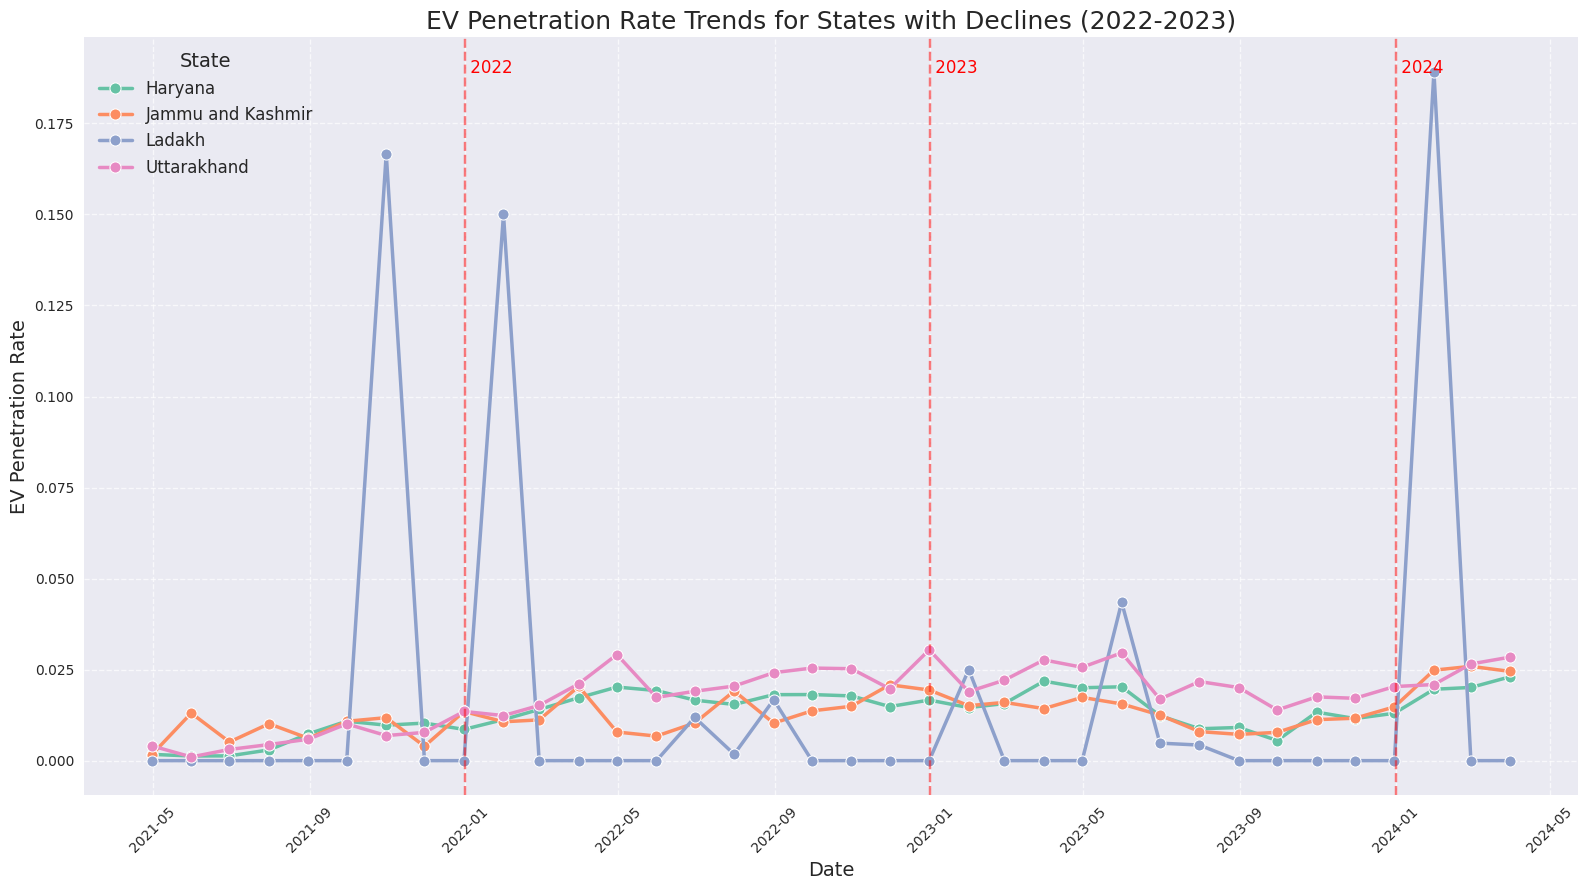

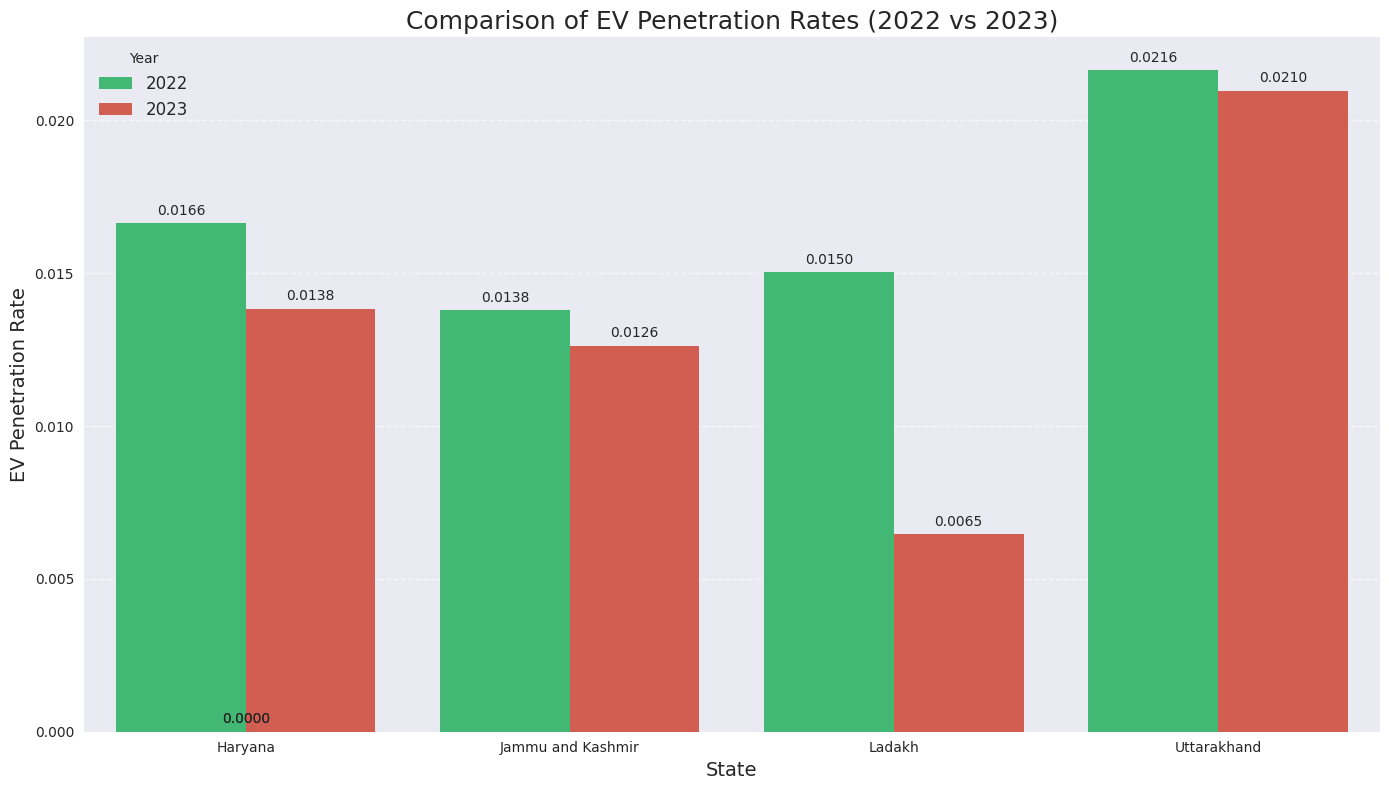

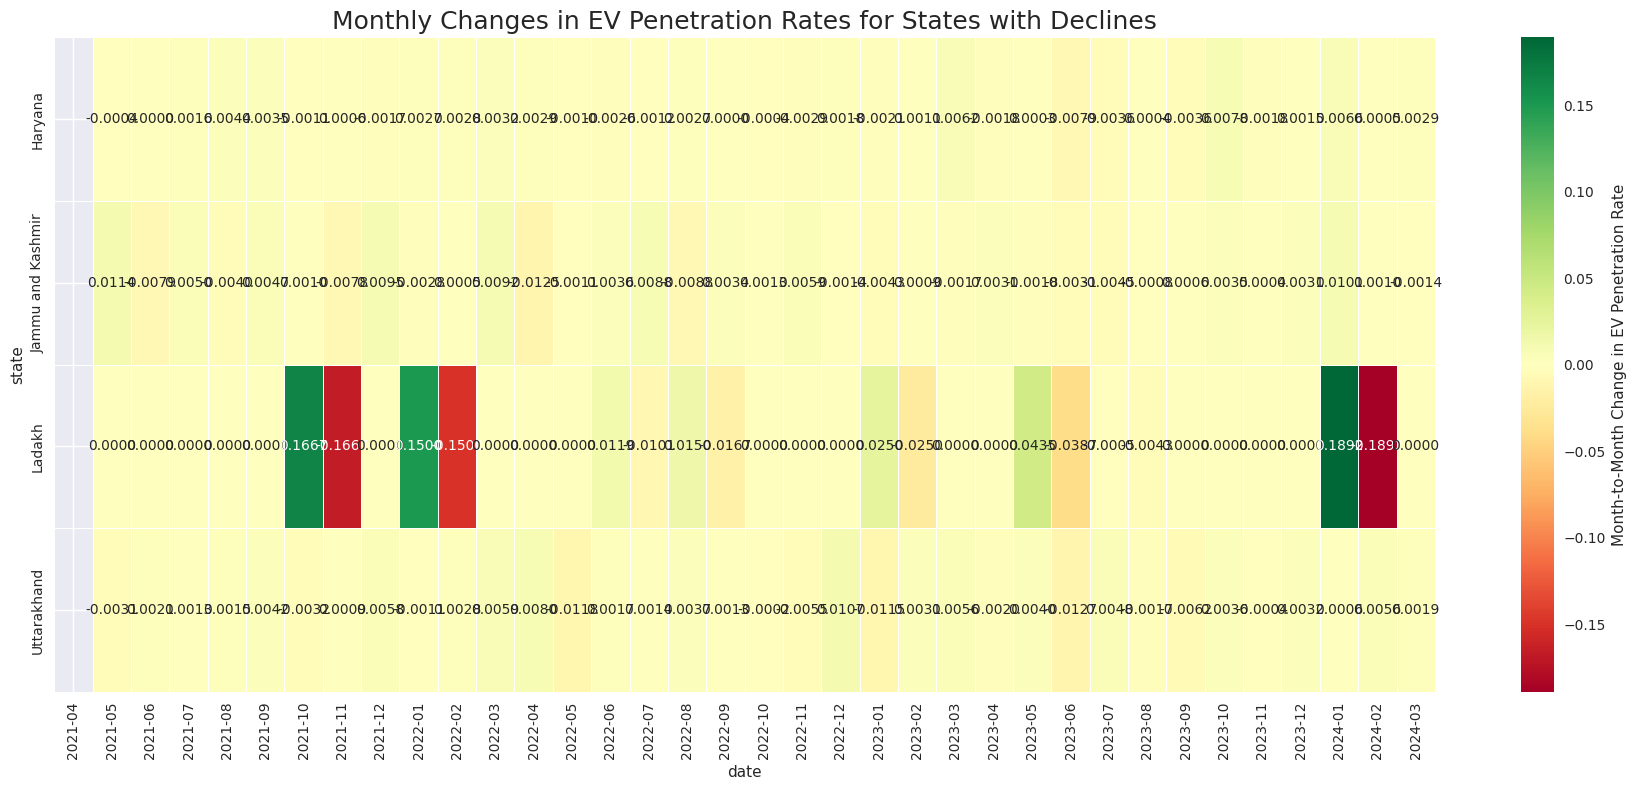

In [8]:
# Visualization of EV Penetration Trends for States with Declines

# Create a focused dataset for the states that experienced declines from 2022 to 2023
declining_states_22_23 = ['Ladakh', 'Haryana', 'Jammu and Kashmir', 'Uttarakhand']

# Filter the state data for these states
declining_df = state_df[state_df['state'].isin(declining_states_22_23)]

# Calculate monthly averages for cleaner visualization
monthly_avg = declining_df.groupby(['state', pd.Grouper(key='date', freq='ME')])['ev_penetration_rate'].mean().reset_index()

# Create a line plot showing the trend across time
plt.figure(figsize=(16, 9))
sns.lineplot(
    data=monthly_avg,
    x='date',
    y='ev_penetration_rate',
    hue='state',
    marker='o',
    linewidth=2.5,
    markersize=8
)

# Add title and labels
plt.title('EV Penetration Rate Trends for States with Declines (2022-2023)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('EV Penetration Rate', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='State', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Add vertical lines marking the years
for year in [2022, 2023, 2024]:
    plt.axvline(x=pd.to_datetime(f'{year}-01-01'), color='red', linestyle='--', alpha=0.5)
    plt.text(pd.to_datetime(f'{year}-01-01'), plt.ylim()[1]*0.95, f' {year}', color='red', fontsize=12)

plt.tight_layout()
plt.show()

# Create a comparative bar chart showing 2022 vs 2023 values
# Create a dataframe with yearly averages for the declining states
yearly_avg = declining_df.groupby(['state', declining_df['date'].dt.year])['ev_penetration_rate'].mean().reset_index()
yearly_avg.columns = ['state', 'year', 'ev_penetration_rate']

# Filter for 2022 and 2023
yearly_22_23 = yearly_avg[yearly_avg['year'].isin([2022, 2023])]

# Create a bar chart
plt.figure(figsize=(14, 8))
chart = sns.barplot(
    data=yearly_22_23,
    x='state',
    y='ev_penetration_rate',
    hue='year',
    palette=['#2ecc71', '#e74c3c']  # Green for 2022, Red for 2023
)

# Add value labels on top of each bar
for i, p in enumerate(chart.patches):
    chart.annotate(
        format(p.get_height(), '.4f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points'
    )

# Add title and labels
plt.title('Comparison of EV Penetration Rates (2022 vs 2023)', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('EV Penetration Rate', fontsize=14)
plt.legend(title='Year', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a heatmap showing monthly changes in penetration rates
# First, pivot the data to create a matrix of states and months
monthly_pivot = monthly_avg.pivot_table(
    index='state',
    columns=monthly_avg['date'].dt.strftime('%Y-%m'),
    values='ev_penetration_rate'
)

# Calculate month-to-month changes
monthly_changes = monthly_pivot.diff(axis=1)

# Create a heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(
    monthly_changes,
    cmap='RdYlGn',  # Red for negative, Yellow for neutral, Green for positive
    center=0,
    annot=True,
    fmt='.4f',
    linewidths=.5,
    cbar_kws={'label': 'Month-to-Month Change in EV Penetration Rate'}
)
plt.title('Monthly Changes in EV Penetration Rates for States with Declines', fontsize=18)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
import plotly.express as px
from datetime import datetime

fig_line = px.line(
    monthly_avg,
    x='date',
    y='ev_penetration_rate',
    color='state',
    markers=True,
    title="📈 EV Penetration Rate Trends (2022–2023) for Declining States",
    labels={
        'ev_penetration_rate': 'EV Penetration Rate',
        'date': 'Date',
        'state': 'State'
    }
)

# Add vertical lines WITHOUT annotation parameters
for year in [2022, 2023, 2024]:
    fig_line.add_vline(
        x=datetime(year, 1, 1),
        line=dict(color='red', dash='dash'),
        opacity=0.5
    )
    # Add separate annotation
    fig_line.add_annotation(
        x=datetime(year, 1, 1),
        y=monthly_avg['ev_penetration_rate'].max(),
        text=f"{year}",
        showarrow=False,
        font=dict(color='red'),
        xanchor='left',
        yanchor='top'
    )

fig_line.update_layout(
    template="plotly_white",
    legend_title_text='State',
    xaxis_title='Date',
    yaxis_title='EV Penetration Rate',
    height=600
)

fig_line.show()


In [10]:
import plotly.graph_objects as go

# Prepare heatmap data
heatmap_data = monthly_changes.fillna(0).round(4)

fig_heatmap = go.Figure(
    data=go.Heatmap(
        z=heatmap_data.values,
        x=heatmap_data.columns,
        y=heatmap_data.index,
        colorscale='RdYlGn',
        zmid=0,
        colorbar=dict(title='Change Rate'),
        text=heatmap_data.values,
        hovertemplate='State: %{y}<br>Month: %{x}<br>Change: %{z}<extra></extra>'
    )
)

fig_heatmap.update_layout(
    title='🌡️ Monthly EV Penetration Rate Changes (Declining States)',
    xaxis_nticks=36,
    xaxis_title='Month',
    yaxis_title='State',
    template="plotly_white",
    height=600
)

fig_heatmap.show()


In [11]:
fig_bar = px.bar(
    yearly_22_23,
    x='state',
    y='ev_penetration_rate',
    color='year',
    barmode='group',
    text=yearly_22_23['ev_penetration_rate'].apply(lambda x: f"{x:.4f}"),
    title="📊 Comparison of EV Penetration Rates (2022 vs 2023)",
    labels={
        'ev_penetration_rate': 'EV Penetration Rate',
        'state': 'State',
        'year': 'Year'
    },
    color_discrete_map={2022: '#2ecc71', 2023: '#e74c3c'}
)

fig_bar.update_traces(textposition='outside')
fig_bar.update_layout(
    template="plotly_white",
    yaxis_title='EV Penetration Rate',
    xaxis_title='State',
    height=600
)

fig_bar.show()


In [18]:
df = pd.read_csv('../../data/processed/ev_sales_by_state_enhanced_20250806.csv')

In [19]:
# Filter for 2024 and the 4 target states
focus_states = ["Ladakh", "Haryana", "Jammu and Kashmir", "Uttarakhand"]
df_2024 = df[(df["year"] == 2024) & (df["state"].isin(focus_states))]

In [20]:

# Compute average EV penetration for 2024
avg_2024 = df_2024.groupby("state")["ev_penetration_rate"].mean().reset_index()

# Plot using Plotly
fig = px.bar(
    avg_2024.sort_values("ev_penetration_rate", ascending=False),
    x="state",
    y="ev_penetration_rate",
    color="state",
    title="📈 EV Penetration Rate in 2024 for Ladakh, Haryana, Jammu & Kashmir, and Uttarakhand",
    labels={"ev_penetration_rate": "EV Penetration Rate", "state": "State"},
    template="plotly_white"
)
fig.update_layout(showlegend=False, height=450, xaxis_tickangle=-30)

fig.show()

In [30]:
import pandas as pd
import plotly.express as px

# Filter the data between Jan 2021 and Dec 2024 for focus states
df_filtered = df[
    (df["state"].isin(focus_states)) &
    (df["date"] >= "2021-01-01") &
    (df["date"] <= "2024-12-31")
].copy()

# Create year-month column
df_filtered["year_month"] = df_filtered["date"].dt.to_period("M").dt.to_timestamp()

# Monthly average EV penetration
monthly_avg = (
    df_filtered
    .groupby(["state", "year_month"])["ev_penetration_rate"]
    .mean()
    .reset_index()
)

# Calculate MoM change
monthly_avg["penetration_change"] = (
    monthly_avg.groupby("state")["ev_penetration_rate"].diff()
)

# Plot using Plotly
fig = px.line(
    monthly_avg,
    x="year_month",
    y="penetration_change",
    color="state",
    markers=True,
    title="📉 Month-over-Month Change in EV Penetration (Jan 2021 – Dec 2024)",
    labels={"year_month": "Month", "penetration_change": "Change in EV Penetration"},
    template="plotly_white"
)

fig.update_layout(
    height=550,
    xaxis_title="Month",
    yaxis_title="MoM Change in EV Penetration",
    legend_title="State",
    xaxis=dict(
        tickformat="%b\n%Y",
        tickangle=-45,
        range=["2021-01-01", "2024-12-31"]
    ),
    yaxis=dict(
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='black'
    )
)

fig.show()


In [33]:
import pandas as pd
import plotly.graph_objects as go

# Prep data
df["date"] = pd.to_datetime(df["date"])
focus_states = ["Ladakh", "Haryana", "Jammu and Kashmir", "Uttarakhand"]
df_filtered = df[
    (df["state"].isin(focus_states)) &
    (df["date"].dt.year >= 2021)
].copy()

df_filtered["year_month"] = df_filtered["date"].dt.to_period("M").dt.to_timestamp()

# Monthly average
monthly_avg = (
    df_filtered.groupby(["state", "year_month"])["ev_penetration_rate"]
    .mean()
    .reset_index()
)

# Month-over-month change
monthly_avg["penetration_change"] = monthly_avg.groupby("state")["ev_penetration_rate"].diff()

# Rolling average
monthly_avg["rolling_avg"] = monthly_avg.groupby("state")["penetration_change"].transform(lambda x: x.rolling(3).mean())

# Start plot
fig = go.Figure()

# Add line traces for each state
for state in monthly_avg["state"].unique():
    state_df = monthly_avg[monthly_avg["state"] == state]

    # Actual monthly change
    fig.add_trace(go.Scatter(
        x=state_df["year_month"],
        y=state_df["penetration_change"],
        mode='lines+markers',
        name=f"{state} (MoM Change)"
    ))

    # Rolling average line
    fig.add_trace(go.Scatter(
        x=state_df["year_month"],
        y=state_df["rolling_avg"],
        mode='lines',
        name=f"{state} (3M Avg)",
        line=dict(dash='dash')
    ))

# Add vertical lines for each year change
for year in [2022, 2023, 2024]:
    fig.add_vline(
        x=pd.Timestamp(f"{year}-01-01"),
        line=dict(color="red", dash="dot"),
        annotation_text=str(year),
        annotation_position="top",
        annotation_font=dict(color="red")
    )

# Add layout details
fig.update_layout(
    title="📊 Month-over-Month Change in EV Penetration (Jan 2021 – Dec 2024) with Trend Lines",
    xaxis_title="Month",
    yaxis_title="MoM Change in EV Penetration",
    height=600,
    template="plotly_white",
    xaxis=dict(tickformat="%b\n%Y", tickangle=-45),
    yaxis=dict(zeroline=True, zerolinewidth=1, zerolinecolor='black'),
    legend_title="State / Rolling Avg"
)

fig.show()


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

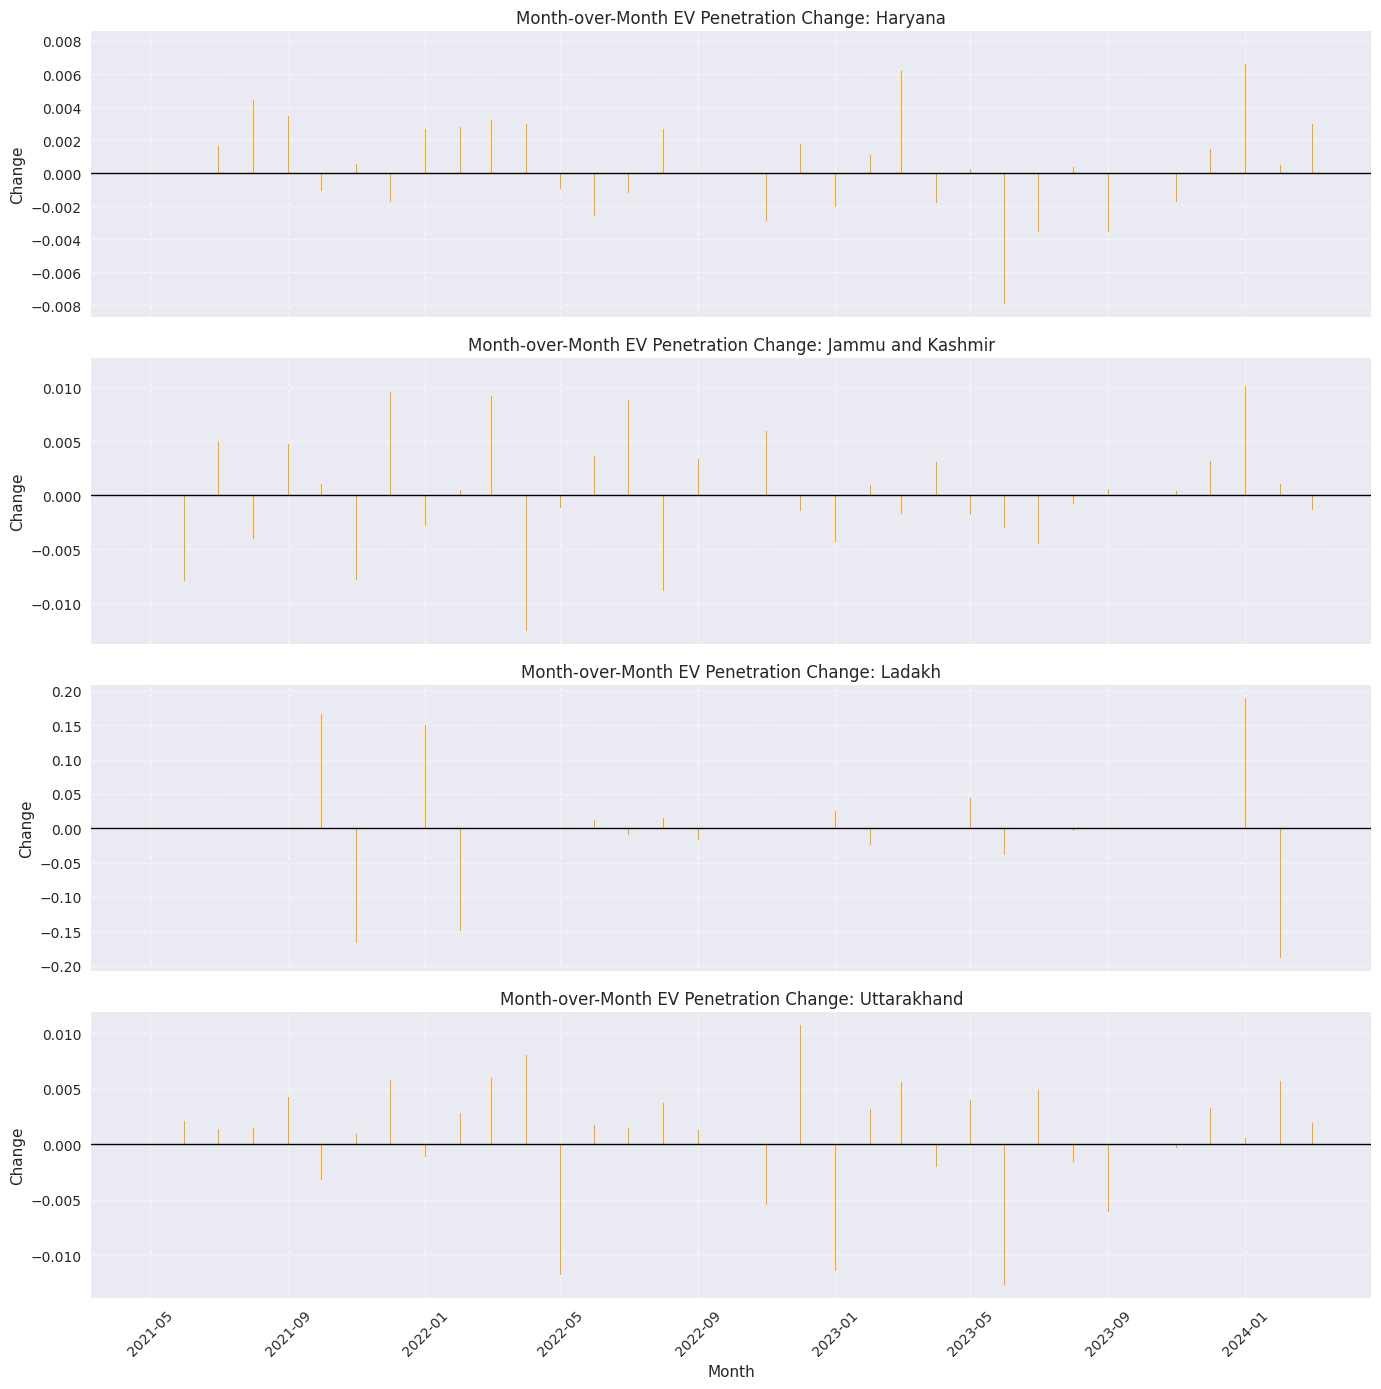

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter data
df_filtered = df[
    (df["state"].isin(focus_states)) &
    (df["date"].dt.year >= 2021)
].copy()

# Create year-month
df_filtered["year_month"] = df_filtered["date"].dt.to_period("M").dt.to_timestamp()

# Monthly average
monthly_avg = (
    df_filtered.groupby(["state", "year_month"])["ev_penetration_rate"]
    .mean()
    .reset_index()
)

# MoM Change
monthly_avg["penetration_change"] = monthly_avg.groupby("state")["ev_penetration_rate"].diff()

# Plot bar chart: One subplot per state
states = monthly_avg["state"].unique()
n_states = len(states)

fig, axes = plt.subplots(n_states, 1, figsize=(14, 3.5 * n_states), sharex=True)

for i, state in enumerate(states):
    state_df = monthly_avg[monthly_avg["state"] == state]
    ax = axes[i] if n_states > 1 else axes
    ax.bar(state_df["year_month"], state_df["penetration_change"], color="orange")
    ax.axhline(0, color="black", linewidth=1)
    ax.set_title(f"Month-over-Month EV Penetration Change: {state}")
    ax.set_ylabel("Change")
    ax.grid(True, linestyle="--", alpha=0.5)

axes[-1].set_xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Comprehensive Analysis of States with Declining EV Penetration (2022-2024)

Based on our analysis of EV penetration trends in India from 2022 to 2024, we can draw several key insights about states that experienced periods of decline:

## States with Significant Declines (2022-2023)

1. **Ladakh**: 
   - Showed the most dramatic decline (-57%) from 2022 to 2023
   - Exhibits highly volatile penetration pattern with sharp spikes in Nov 2021, Feb 2022, and Feb 2024
   - Had the lowest baseline penetration among the declining states
   - This volatility is likely due to Ladakh's small market size where small absolute changes create large percentage shifts

2. **Haryana**:
   - Moderate decline (-16.8%) from 2022 to 2023
   - Shows more stable month-to-month penetration compared to Ladakh
   - Penetration consistently remained around 0.01-0.02 throughout the period

3. **Jammu and Kashmir**:
   - Minor decline (-8.5%) from 2022 to 2023
   - Shows similar stable patterns to Haryana but with slightly more volatility

4. **Uttarakhand**:
   - Smallest decline (-3.1%) from 2022 to 2023
   - Maintained the highest average penetration rate among the declining states
   - Shows the most consistent month-to-month penetration pattern

## Recovery Patterns

The visualization clearly shows that all four states that experienced declines from 2022 to 2023 showed signs of recovery in 2023-2024. This indicates:

1. The declines were temporary rather than representing a long-term downward trend
2. EV adoption in these states likely faced specific challenges in 2022-2023 that were overcome in subsequent periods

## Important Observations

1. **Volatility in Smaller Markets**: Ladakh's extreme volatility highlights how smaller markets can show dramatic percentage changes from relatively small absolute shifts in EV sales.

2. **Regional Factors**: All four states with declines are in the northern region of India, suggesting potential regional factors that may have temporarily affected EV adoption in this area during 2022-2023.

3. **Recovery Trajectory**: While these states experienced a temporary setback, the overall trajectory remains positive across the full 2022-2024 period, consistent with India's broader EV growth story.

## Market Implications

The temporary declines observed in these northern states during 2022-2023 could be attributed to:
- Regional policy changes affecting EV incentives
- Supply chain disruptions in northern India
- Market saturation after initial adoption waves
- Economic factors specific to these regions

Despite these temporary setbacks, the overall trend across India remains positive for EV adoption from 2022 to 2024, with all states eventually showing recovery from their temporary declines.

# India's Electric 2-Wheeler Market: Leaders and Laggards (FY 2023-2024)

## Key Findings

### Market Leadership Dynamics
- **OLA ELECTRIC** has maintained a commanding lead in the 2-wheeler EV market across both fiscal years, demonstrating its market dominance.
- **TVS** has made impressive gains in FY 2024, solidifying its position as a strong #2 competitor.
- **ATHER** has consistently remained in the top 3, showing resilience in this competitive market.

### Performance Patterns
- The **sales volume gap** between the top and bottom manufacturers is enormous, highlighting the stark market concentration.
- **Year-over-Year growth** for the top manufacturers shows the market is expanding rapidly, with leaders scaling their operations effectively.
- Some manufacturers appear in the top ranks in FY 2024 that weren't there in FY 2023, indicating new strong market entrants.

### Struggling Players
- The **bottom performers** have notably low sales volumes compared to market leaders.
- Several manufacturers consistently remain at the bottom across both fiscal years, suggesting persistent challenges in gaining market traction.
- The relative difference between bottom performers is much smaller than between top performers, indicating a crowded space at the lower end of the market.

## Business Implications
1. **Market Consolidation** appears to be occurring, with top players capturing an increasingly larger share of the market.
2. **Entry Barriers** seem significant, as evidenced by the consistent struggle of bottom performers.
3. **Growth Opportunity** exists for mid-tier players to scale and potentially challenge the established leaders.

This analysis demonstrates a classic "winner-takes-most" market dynamic in India's emerging electric 2-wheeler sector.

In [ ]:
# Filter for 2-wheelers and relevant fiscal years
two_wheelers = df[
  (df['vehicle_category'] == '2-Wheelers') & 
  (df['date'] >= '2022-04-01') & 
  (df['date'] <= '2024-03-01')
]

# Group by maker and calculate total sales for each fiscal year
yearly_sales = two_wheelers.groupby(['maker', pd.PeriodIndex(two_wheelers['date'], freq='Y-MAR')])['electric_vehicles_sold'].sum().reset_index()
yearly_sales['fiscal_year'] = yearly_sales['date'].astype(str).str[:4]

# Get top 3 and bottom 3 for each fiscal year
for year in ['2023', '2024']:
  year_data = yearly_sales[yearly_sales['fiscal_year'] == year].sort_values('electric_vehicles_sold', ascending=False)
  
  print(f"\nFiscal Year {year}")
  print("-" * 50)
  print("\nTop 3 Makers:")
  print(year_data.head(3)[['maker', 'electric_vehicles_sold']].to_string(index=False))
  print("\nBottom 3 Makers:")
  print(year_data.tail(3)[['maker', 'electric_vehicles_sold']].to_string(index=False))

To **compare makers and find out who's growing the fastest**, we’ll use **cumulative sales over time** and calculate their **growth rate**.

There are multiple ways to define "growing the fastest," but the two most common are:

---

## 🔍 Option 1: Total Growth (From First to Last Date)

### ➕ Measures:

* Growth = Last cumulative sales − First cumulative sales
* Higher value = More growth

## 🔍 Option 2: Growth Rate (%)

Useful when some makers start with very small sales.

## 🧠 Interpretation:

* `total_growth` → Who **sold the most more** over time
* `growth_percent` → Who **grew the fastest** relative to their start


In [ ]:
# Ensure date is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Sort the data
df = df.sort_values(['maker', 'date'])

# Calculate cumulative sales
df['cumulative_sales'] = df.groupby('maker')['electric_vehicles_sold'].cumsum()

# Get the first and last cumulative sales for each maker
first_last = df.groupby('maker').agg(
    first_date=('date', 'first'),
    last_date=('date', 'last'),
    first_cum_sales=('cumulative_sales', 'first'),
    last_cum_sales=('cumulative_sales', 'last')
)

# Calculate total growth
first_last['total_growth'] = first_last['last_cum_sales'] - first_last['first_cum_sales']

# Sort by total growth descending
fastest_growing = first_last.sort_values(by='total_growth', ascending=False)
print(fastest_growing[['first_date', 'last_date', 'total_growth']])

In [ ]:
# Add percent growth
first_last['growth_percent'] = (
    (first_last['last_cum_sales'] - first_last['first_cum_sales']) /
    (first_last['first_cum_sales'].replace(0, 1))  # Avoid division by zero
) * 100

# Sort by percentage growth
fastest_growing_percent = first_last.sort_values(by='growth_percent', ascending=False)
print(fastest_growing_percent[['total_growth', 'growth_percent']])
